#### Prerequisite Libraries

In [2]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00


#### Code and Output


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

qc = QuantumCircuit(3, 3)

qc.initialize([0, 1], 0)

qc.h(1)
qc.cx(1, 2)

qc.cx(0, 1)
qc.h(0)

qc.measure([0, 1], [0, 1])

qc.cx(1, 2)  
qc.cz(0, 2)  
qc.measure(2, 2)

print("Quantum Teleportation Circuit:")
print(qc.draw(output='text'))

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)

job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

counts = result.get_counts(qc)
print("\nTeleported state:")
print(counts)


Quantum Teleportation Circuit:
     ┌─────────────────┐          ┌───┐┌─┐           
q_0: ┤ Initialize(0,1) ├───────■──┤ H ├┤M├──────■────
     └──────┬───┬──────┘     ┌─┴─┐└┬─┬┘└╥┘      │    
q_1: ───────┤ H ├─────────■──┤ X ├─┤M├──╫───■───┼────
            └───┘       ┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │ ┌─┐
q_2: ───────────────────┤ X ├───────╫───╫─┤ X ├─■─┤M├
                        └───┘       ║   ║ └───┘   └╥┘
c: 3/═══════════════════════════════╩═══╩══════════╩═
                                    1   0          2 

Teleported state:
{'111': 273, '101': 250, '100': 244, '110': 257}


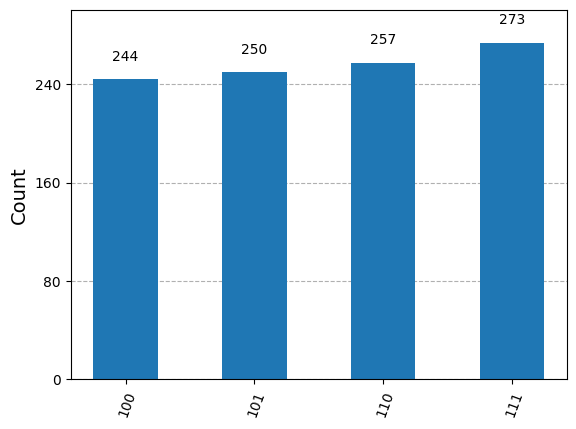

In [2]:
plot_histogram(counts)
